Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Displaying images for grid ---


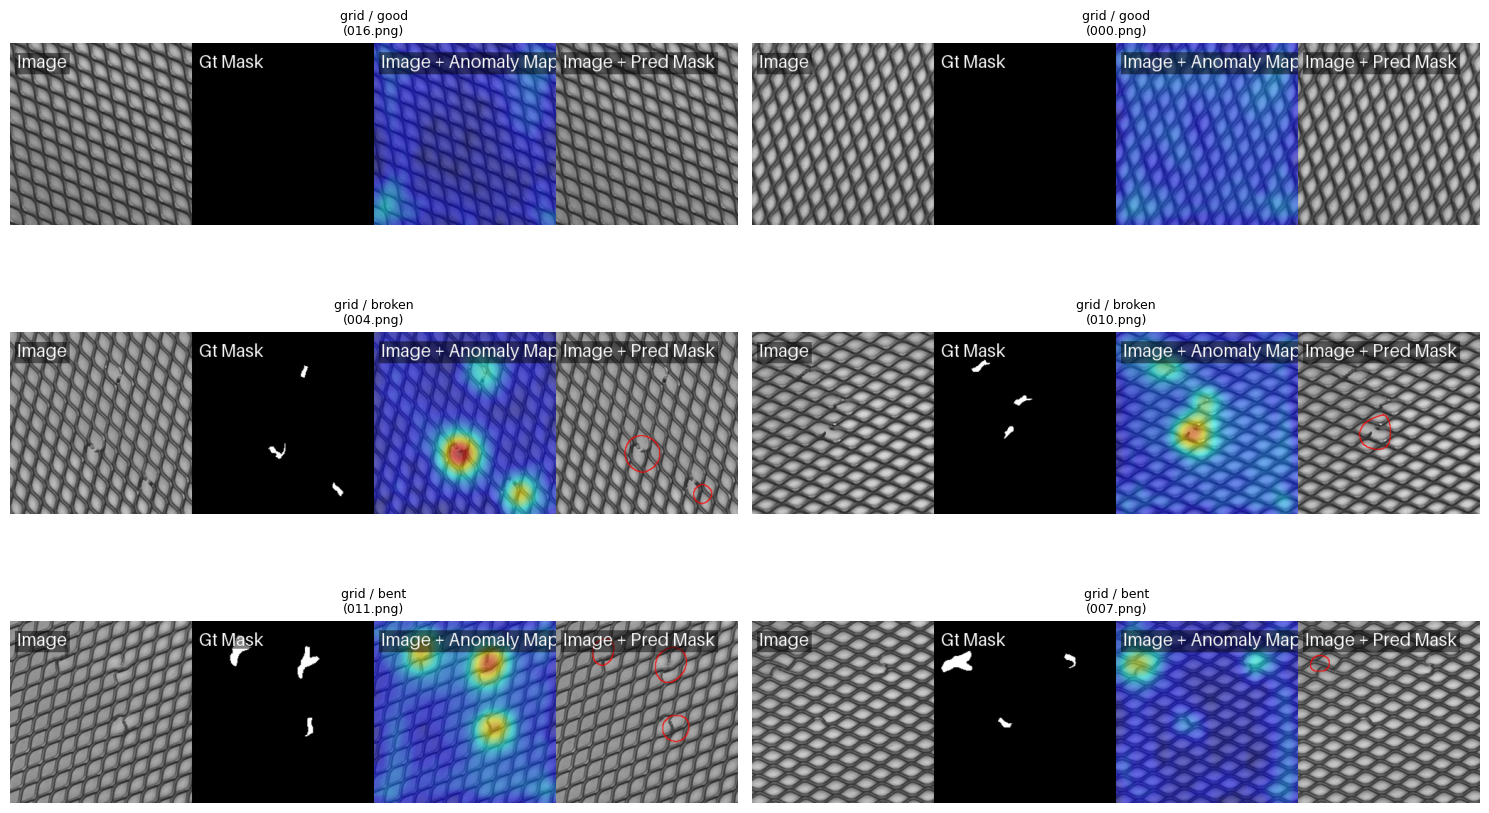


--- Displaying images for leather ---


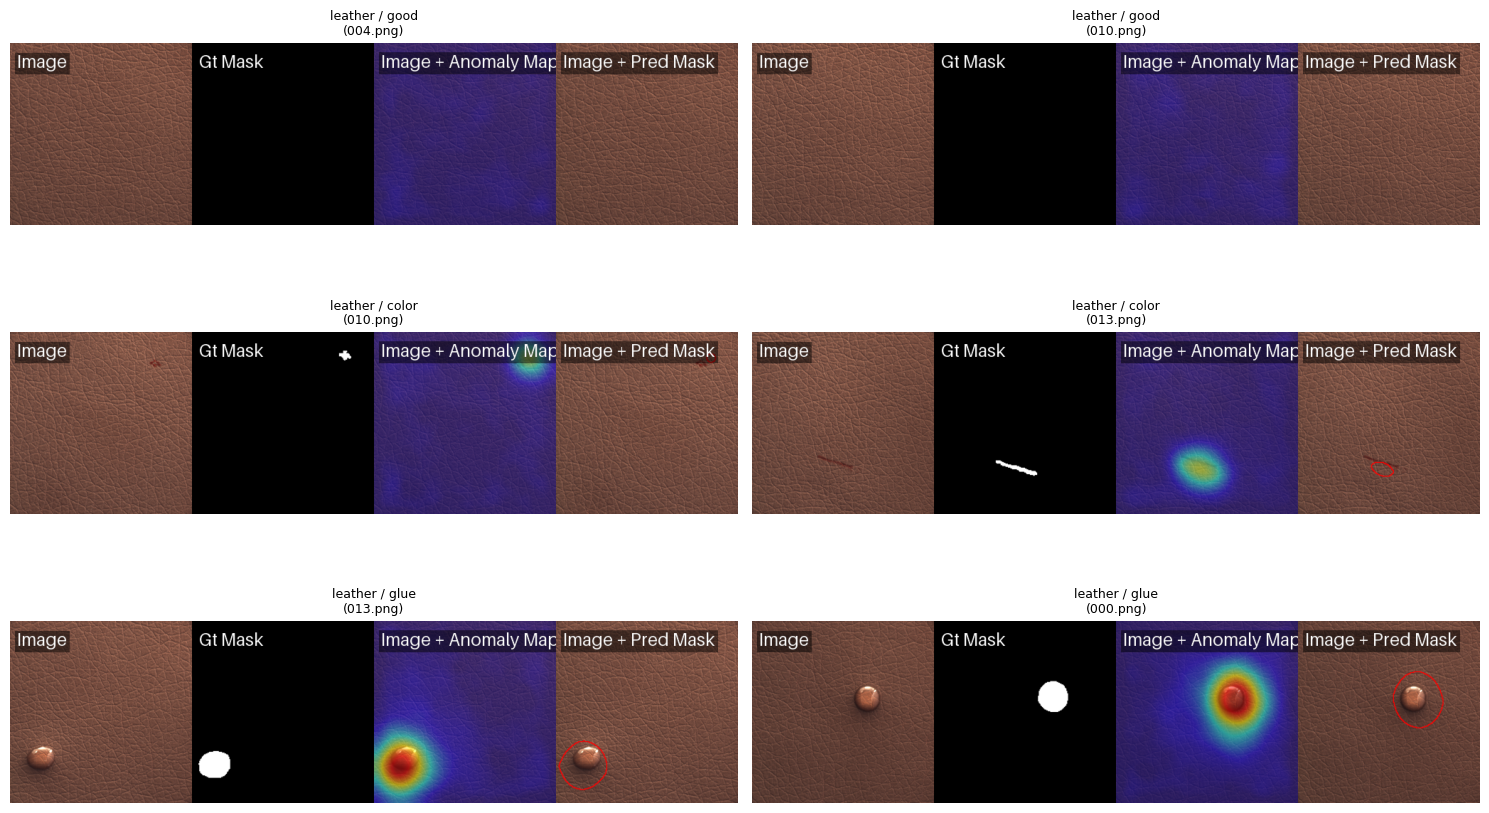


--- Displaying images for tile ---


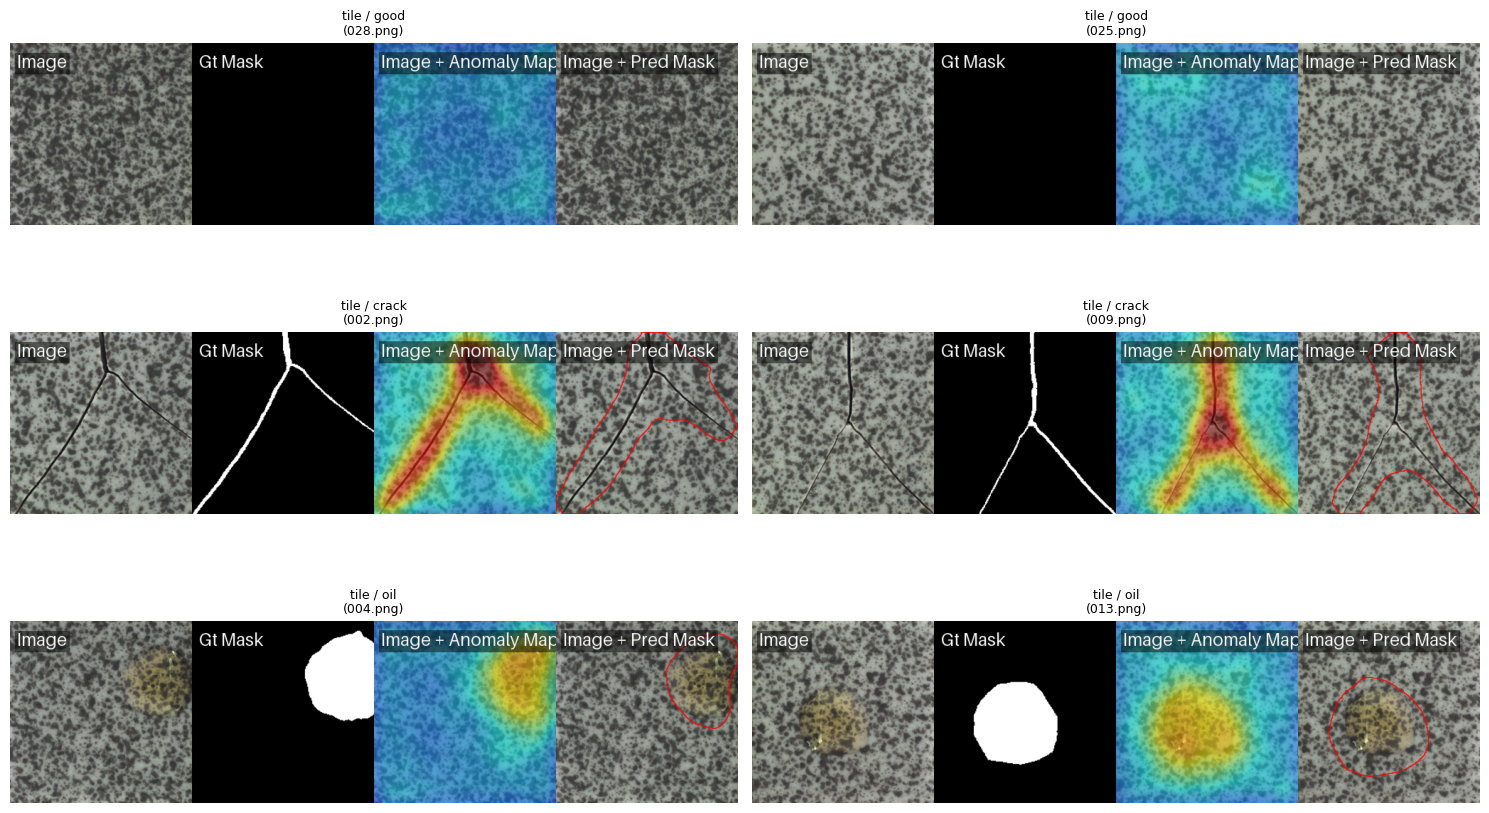

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive


drive.mount('/content/drive')
base_dir = '/content/drive/MyDrive/results/Patchcore/MVTecAD'
main_folders = ['grid', 'leather', 'tile']

anomaly_folders = {
    'grid': ['broken', 'bent'],
    'leather': ['color', 'glue'],
    'tile': ['crack', 'oil']
}

def display_images_from_folders(main_category, folder_paths, num_images_per_folder=2):
    all_image_data = []


    for folder_path in folder_paths:
        if os.path.exists(folder_path):
            sub_category = os.path.basename(folder_path)

            print(f"Collecting images from: {folder_path}")
            image_files = [
                os.path.join(folder_path, f)
                for f in os.listdir(folder_path)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]


            for img_path in image_files[:num_images_per_folder]:
                label = f"{main_category} / {sub_category}"
                all_image_data.append({'path': img_path, 'label': label})
        else:
            print(f"Folder not found: {folder_path}")

    if not all_image_data:
        print("No images found in the specified folders.")
        return

    num_rows = len(folder_paths)
    num_cols = num_images_per_folder
    plt.figure(figsize=(15, 3 * num_rows))
    plt.subplots_adjust(hspace=0.5, wspace=0.1)

    for i, data in enumerate(all_image_data):
        try:
            img = mpimg.imread(data['path'])

            plt.subplot(num_rows, num_cols, i + 1)
            plt.imshow(img)


            title_text = f"{data['label']}\n({os.path.basename(data['path'])})"
            plt.title(title_text, fontsize=9)
            plt.axis('off')

        except Exception as e:
            print(f"Could not read image {os.path.basename(data['path'])}: {e}")

    plt.tight_layout()
    plt.show()

for main_folder in main_folders:
    print(f"\n--- Displaying images for {main_folder} ---")

    test_base_path = os.path.join(base_dir, main_folder, 'v0', 'images', 'test')

    good_folder_path = os.path.join(test_base_path, 'good')

    folders_to_display = [good_folder_path]

    if main_folder in anomaly_folders:
        for anomaly_folder_name in anomaly_folders[main_folder]:
            anomaly_folder_path = os.path.join(test_base_path, anomaly_folder_name)
            folders_to_display.append(anomaly_folder_path)


    display_images_from_folders(main_folder, folders_to_display, num_images_per_folder=2)